In [1]:
!pip install tensorflow 
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import all the necessary files!
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd


In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.17.0


In [7]:
# Selecting the dataset as CIFAR10
cifar10 = tf.keras.datasets.cifar10

# Train and Test Images Partitioning along with their labels
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Finding total number of images in training and test set
print(len(training_images))
print(len(test_images))

# Check shape of training images
print(training_images.shape)


50000
10000
(50000, 32, 32, 3)


In [8]:
# Reshaping and Normalizing training and test images
# Normalize the pixel values between 0 and 1
training_images = training_images / 255.0
test_images = test_images / 255.0

# Check shape after normalization
print("Normalized shape of training images:", training_images.shape)


Normalized shape of training images: (50000, 32, 32, 3)


In [9]:
# Reshape images for LSTM input: (50000, 32, 32, 3) -> (50000, 32*32, 3)
training_images = training_images.reshape(50000, 32*32, 3)
test_images = test_images.reshape(10000, 32*32, 3)


In [10]:
# Build the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(32*32, 3), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["acc"])
model.fit(training_images, training_labels, batch_size = 50, epochs=20)


C:\Users\Tjoppie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 206s 205ms/step - acc: 0.1560 - loss: 2.2290
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 206s 206ms/step - acc: 0.1960 - loss: 2.1672
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 204s 204ms/step - acc: 0.1450 - loss: 2.2394
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 203ms/step - acc: 0.1950 - loss: 2.1610
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 203ms/step - acc: 0.2076 - loss: 2.1354
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 203ms/step - acc: 0.2244 - loss: 2.1102
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 203s 203ms/step - acc: 0.2224 - loss: 2.1017
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 205s 205ms/step - acc: 0.2301 - loss: 2.1025
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 204s 204ms/step - acc: 0.2172 - loss: 2.1221
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 200s 200ms/step - acc: 0.2180 - loss: 2.1179
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 199s 199ms/step - acc: 0.2040 - loss: 2.1543
Epoch 12/20
1000/1000 ━━━━━━━━━━━━━━━━━━━

In [11]:
model.save('lstm_model.keras')

Label distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


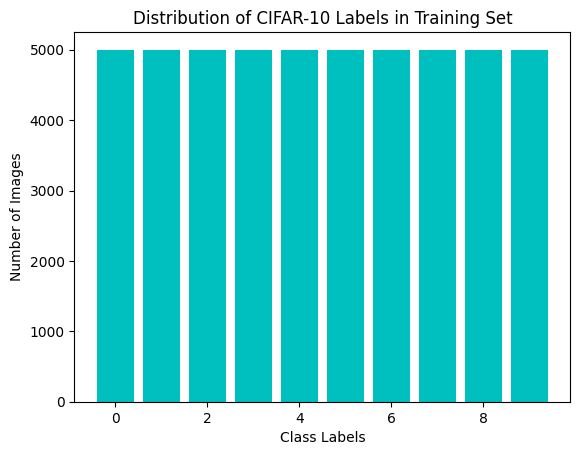

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Basic statistics on the labels (number of images per class)
unique, counts = np.unique(training_labels, return_counts=True)
label_distribution = dict(zip(unique, counts))

print("Label distribution:", label_distribution)

# Plot the distribution of labels
plt.bar(label_distribution.keys(), label_distribution.values(), color='c')
plt.title('Distribution of CIFAR-10 Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.show()

Shape of training_images: (50000, 32, 32, 3)


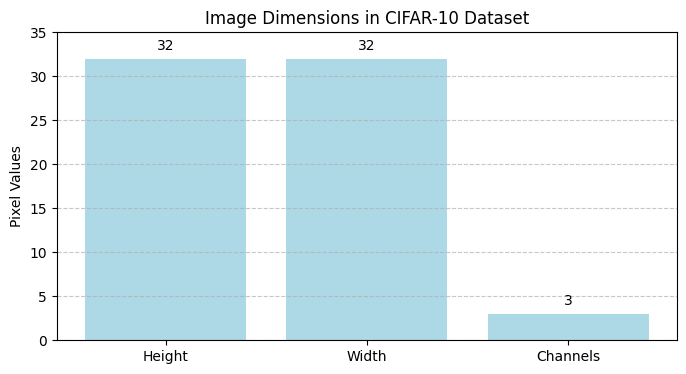

In [13]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Check the shape of training_images
print("Shape of training_images:", training_images.shape)

# Use the original CIFAR-10 shape
image_height, image_width, num_channels = 32, 32, 3

# Create a bar plot for image dimensions
dimensions = ['Height', 'Width', 'Channels']
values = [image_height, image_width, num_channels]

plt.figure(figsize=(8, 4))
plt.bar(dimensions, values, color='lightblue')
plt.title('Image Dimensions in CIFAR-10 Dataset')
plt.ylabel('Pixel Values')
plt.ylim(0, 35)  # Setting the y-limit to better visualize the dimensions
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the pixel values
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')

plt.show()

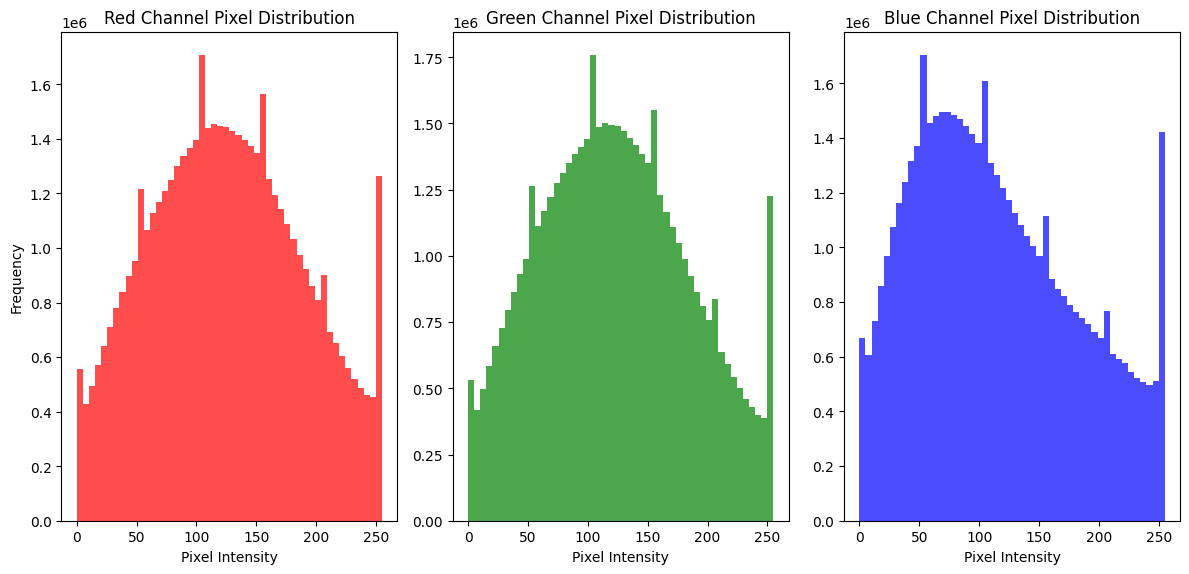

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the images for easier analysis (50000 images with 32x32 pixels and 3 channels)
flattened_images = training_images.reshape(-1, 3)

# Extract pixel values for each color channel
red_channel = flattened_images[:, 0]  # Red channel
green_channel = flattened_images[:, 1]  # Green channel
blue_channel = flattened_images[:, 2]  # Blue channel

# Plotting histograms for each color channel to show pixel value distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(red_channel, bins=50, color='red', alpha=0.7)
plt.title('Red Channel Pixel Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(green_channel, bins=50, color='green', alpha=0.7)
plt.title('Green Channel Pixel Distribution')
plt.xlabel('Pixel Intensity')

plt.subplot(1, 3, 3)
plt.hist(blue_channel, bins=50, color='blue', alpha=0.7)
plt.title('Blue Channel Pixel Distribution')
plt.xlabel('Pixel Intensity')

plt.tight_layout()
plt.show()


In [15]:
print("Mean pixel values (R, G, B):", np.mean(flattened_images, axis=0))
print("Median pixel values (R, G, B):", np.median(flattened_images, axis=0))
print("Standard deviation (R, G, B):", np.std(flattened_images, axis=0))
print("Min pixel values (R, G, B):", np.min(flattened_images, axis=0))
print("Max pixel values (R, G, B):", np.max(flattened_images, axis=0))


Mean pixel values (R, G, B): [125.30691805 122.95039414 113.86538318]
Median pixel values (R, G, B): [123. 121. 104.]
Standard deviation (R, G, B): [62.99321928 62.08870764 66.70489964]
Min pixel values (R, G, B): [0 0 0]
Max pixel values (R, G, B): [255 255 255]


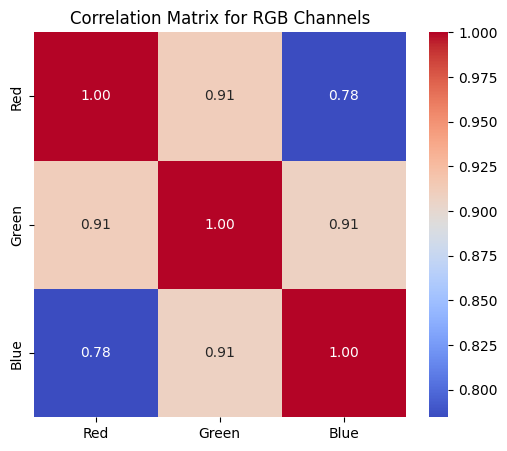

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape training images to (50000, 32*32, 3) to flatten the pixel data
reshaped_images = training_images.reshape(-1, 3)  # Flatten all pixels across all images

# Compute the correlation matrix for the color channels (Red, Green, Blue)
correlation_matrix = np.corrcoef(reshaped_images, rowvar=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=['Red', 'Green', 'Blue'], 
            yticklabels=['Red', 'Green', 'Blue'])
plt.title("Correlation Matrix for RGB Channels")
plt.show()


In [18]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.9/38.8 MB 10.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.8 MB 24.3 MB/s eta 0:00:02
   --- ------------------------------------ 3.7/38.8 MB 26.5 MB/s eta 0:00:02
   ---- ----------------------------------- 4.2/38.8 MB 17.9 MB/s eta 0:00:02
   ------- -------------------------------- 6.9/38.8 MB 27.5 MB/s eta 0:00:02
   ----------- ---------------------------- 10.8/38.8 MB 40.9 MB/s eta 0:00:01
   ----------- ---------------------------- 10.8/38.8 MB 40.9 MB/s eta 0:00:01
   ------------- -------------------------- 13.0/38.8 MB 34.4 MB/s eta 0:00:01
   ---------------- ----------------------- 16.4/38.8 MB 43.7 MB/s eta 0:00:01
   ----------------- ---------------------- 16.9/38.8 MB 46.9 MB/s eta 0:00:01
   ------------------- -------------------- 18.8/38.8 MB 38.5 MB/s e


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# LSTM Autoencoder

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 269s 668ms/step - loss: 0.0503 - val_loss: 0.0414
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 257s 658ms/step - loss: 0.0412 - val_loss: 0.0384
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 257s 658ms/step - loss: 0.0390 - val_loss: 0.0367
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 253s 647ms/step - loss: 0.0373 - val_loss: 0.0353
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 253s 648ms/step - loss: 0.0366 - val_loss: 0.0347
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 254s 650ms/step - loss: 0.0352 - val_loss: 0.0334
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 253s 648ms/step - loss: 0.0344 - val_loss: 0.0327
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 644ms/step - loss: 0.0336 - val_loss: 0.0308
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 645ms/step - loss: 0.0324 - val_loss: 0.0303
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 251s 643ms/step - loss: 0.0320 - val_loss: 0.0305
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 249s 637ms/step - loss: 0.0316 - val_loss: 0.0299
Epoch 12

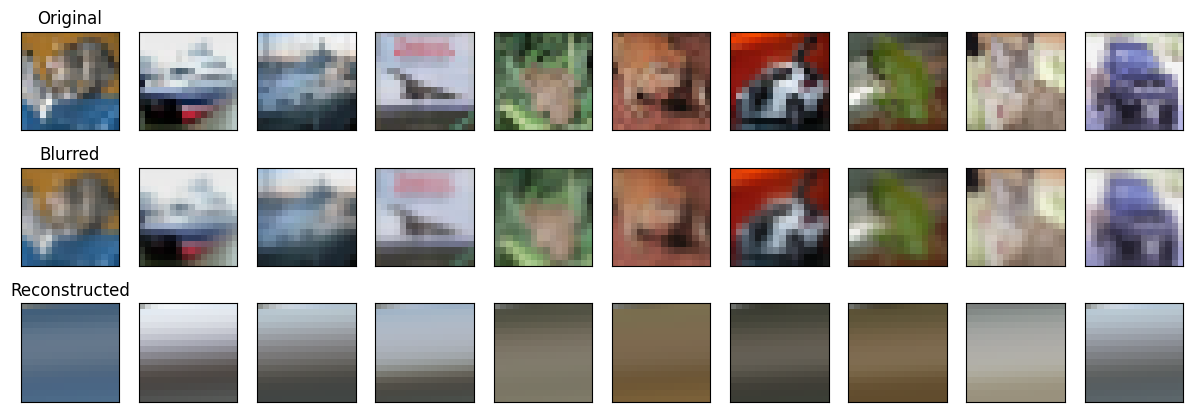

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# Load CIFAR-10 dataset
(training_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

# Reshape the images to be in (32, 32, 3) and normalize to [0, 1]
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add Gaussian blur to the images
def add_gaussian_blur(images):
    blurred_images = np.zeros_like(images)
    for i in range(images.shape[0]):
        blurred_images[i] = cv2.GaussianBlur(images[i], (5, 5), 0)
    return blurred_images

blurred_training_images = add_gaussian_blur(training_images)
blurred_test_images = add_gaussian_blur(test_images)

# Resize the images to a smaller resolution (16x16) to reduce complexity
def resize_images(images, size=(16, 16)):
    resized_images = np.zeros((images.shape[0], size[0], size[1], images.shape[3]))
    for i in range(images.shape[0]):
        resized_images[i] = cv2.resize(images[i], size)
    return resized_images

training_images_resized = resize_images(training_images, size=(16, 16))
test_images_resized = resize_images(test_images, size=(16, 16))
blurred_training_images_resized = resize_images(blurred_training_images, size=(16, 16))
blurred_test_images_resized = resize_images(blurred_test_images, size=(16, 16))

# Build the LSTM autoencoder model with reduced complexity
lstm_autoencoder = models.Sequential()

# Encoder
lstm_autoencoder.add(layers.LSTM(16, input_shape=(16*16, 3), return_sequences=True))  # Reduce LSTM units to 16
lstm_autoencoder.add(layers.LSTM(16))
lstm_autoencoder.add(layers.Dropout(0.25))

# Decoder
lstm_autoencoder.add(layers.RepeatVector(16*16))
lstm_autoencoder.add(layers.LSTM(16, return_sequences=True))
lstm_autoencoder.add(layers.LSTM(16, return_sequences=True))
lstm_autoencoder.add(layers.TimeDistributed(layers.Dense(3, activation='sigmoid')))

# Compile the model
lstm_autoencoder.compile(optimizer='adam', loss='mse')

# Add EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the autoencoder with batch size 128, resized images, and EarlyStopping
lstm_autoencoder.fit(blurred_training_images_resized.reshape(-1, 16*16, 3),
                     training_images_resized.reshape(-1, 16*16, 3),
                     epochs=20, batch_size=128,
                     validation_data=(blurred_test_images_resized.reshape(-1, 16*16, 3),
                                      test_images_resized.reshape(-1, 16*16, 3)),
                     callbacks=[early_stopping])

# Predictions
reconstructed_images = lstm_autoencoder.predict(blurred_test_images_resized.reshape(-1, 16*16, 3))

# Reshape reconstructed images to original shape
reconstructed_images = reconstructed_images.reshape(-1, 16, 16, 3)

# Evaluation: Precision, Recall, Accuracy
def calculate_metrics(y_true, y_pred):
    # Convert to binary for simplicity (reconstruction threshold 0.5)
    y_true_binary = (y_true > 0.5).astype(int)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Flatten the arrays
    y_true_flat = y_true_binary.flatten()
    y_pred_flat = y_pred_binary.flatten()

    # Calculate metrics
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
    accuracy = accuracy_score(y_true_flat, y_pred_flat)

    return precision, recall, accuracy

precision, recall, accuracy = calculate_metrics(test_images_resized, reconstructed_images)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}')

# Function to display original, blurred, and reconstructed images
def display_images(original, blurred, reconstructed, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Original images
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Original")
        
        # Blurred images
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(blurred[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Blurred")
        
        # Reconstructed images
        ax = plt.subplot(3, num_images, i + 1 + num_images * 2)
        plt.imshow(reconstructed[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title("Reconstructed")
    plt.show()

# Display some original, blurred, and reconstructed images
display_images(test_images_resized, blurred_test_images_resized, reconstructed_images)


# Hybrid Autoencoder (LSTM + CNN)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
 - val_precision: 0.8465 - val_recall: 0.7599 - val_accuracy: 0.8317
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - loss: 0.0353 - val_loss: 0.0191 - val_precision: 0.8465 - val_recall: 0.7599 - val_accuracy: 0.8317
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
 - val_precision: 0.8482 - val_recall: 0.8225 - val_accuracy: 0.8553
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0179 - val_loss: 0.0153 - val_precision: 0.8482 - val_recall: 0.8225 - val_accuracy: 0.8553
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
 - val_precision: 0.8442 - val_recall: 0.8521 - val_accuracy: 0.8641
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0149 - val_loss: 0.0137 - val_precision: 0.8442 - val_recall: 0.8521 - val_accuracy: 0.8641
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
 - val_precision: 0.8436 - val_recall: 0.8641 - val_accuracy: 0.8681
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - loss: 0.0134 - val_loss: 0.0130 - va

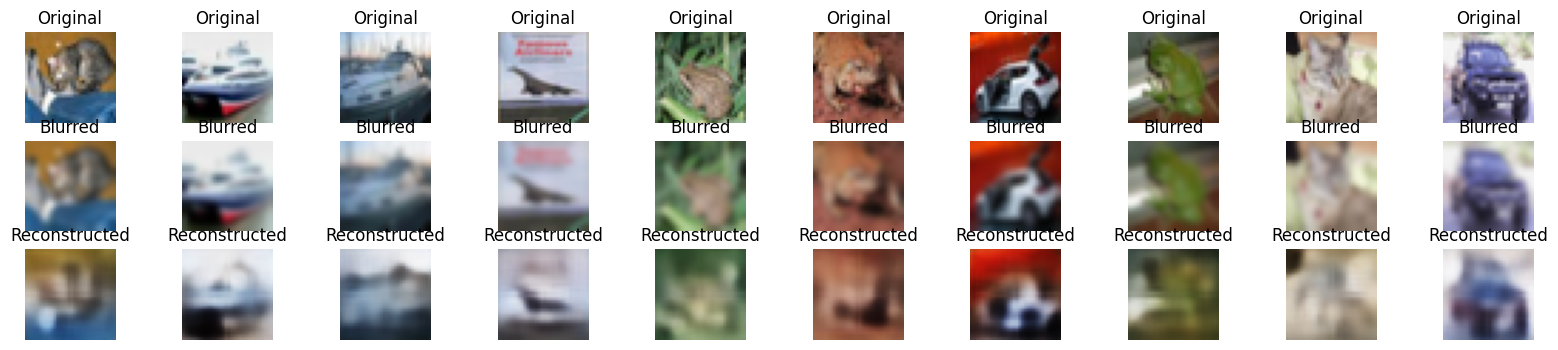

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(training_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

# Reshape the images to (32, 32, 3) and normalize to [0, 1]
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Apply Gaussian blur to the images to simulate noise
def add_gaussian_blur(images):
    blurred_images = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in images])
    return blurred_images

blurred_training_images = add_gaussian_blur(training_images)
blurred_test_images = add_gaussian_blur(test_images)

# Define the hybrid CNN + LSTM Autoencoder model
input_img = layers.Input(shape=(32, 32, 3))

# Encoder (CNN)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Flatten and reshape for LSTM processing
shape_before_lstm = x.shape[1:]  # Save this for reshaping later
x = layers.Reshape((shape_before_lstm[0] * shape_before_lstm[1], shape_before_lstm[2]))(x)

# LSTM layers for sequence processing
x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(64)(x)

# Decoder (reshape and CNN)
x = layers.RepeatVector(4 * 4)(x)  # Repeat to match the flattened dimension
x = layers.Reshape((4, 4, 64))(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Define the model
hybrid_autoencoder = models.Model(input_img, decoded)

# Compile the model
hybrid_autoencoder.compile(optimizer='adam', loss='mse')

# Custom metrics callback for precision, recall, and accuracy
class CustomMetrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(CustomMetrics, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Get predictions
        y_pred = self.model.predict(self.validation_data[0])
        y_true = self.validation_data[1]

        # Convert to binary format using a threshold
        y_pred_binary = (y_pred > 0.5).astype(int)
        y_true_binary = (y_true > 0.5).astype(int)

        # Calculate True Positives, True Negatives, False Positives, False Negatives
        TP = np.sum(np.logical_and(y_pred_binary == 1, y_true_binary == 1))
        TN = np.sum(np.logical_and(y_pred_binary == 0, y_true_binary == 0))
        FP = np.sum(np.logical_and(y_pred_binary == 1, y_true_binary == 0))
        FN = np.sum(np.logical_and(y_pred_binary == 0, y_true_binary == 1))

        # Calculate Precision, Recall, Accuracy
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        accuracy = (TP + TN) / (TP + TN + FP + FN)

        # Log metrics
        logs['val_precision'] = precision
        logs['val_recall'] = recall
        logs['val_accuracy'] = accuracy
        print(f' - val_precision: {precision:.4f} - val_recall: {recall:.4f} - val_accuracy: {accuracy:.4f}')

# Create an instance of CustomMetrics with validation data
cnn_metrics = CustomMetrics(validation_data=(blurred_test_images, test_images))

# Train the hybrid autoencoder with custom metrics
history_hybrid = hybrid_autoencoder.fit(blurred_training_images, training_images, epochs=50, 
                                        batch_size=64, validation_data=(blurred_test_images, test_images), 
                                        callbacks=[cnn_metrics])

# Function to display original, blurred, and reconstructed images
def display_images(original, blurred, reconstructed, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original image
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Display blurred image
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(blurred[i])
        plt.title("Blurred")
        plt.axis("off")

        # Display reconstructed image
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Generate reconstructed images
reconstructed_images = hybrid_autoencoder.predict(blurred_test_images)

# Display the images
display_images(test_images, blurred_test_images, reconstructed_images)


# CNN AUTOENCODER

C:\Users\Tjoppie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 - val_precision: 0.8740 - val_recall: 0.8900 - val_accuracy: 0.8938
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.0213 - val_loss: 0.0090 - val_precision: 0.8740 - val_recall: 0.8900 - val_accuracy: 0.8938
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 - val_precision: 0.8991 - val_recall: 0.8918 - val_accuracy: 0.9072
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0087 - val_loss: 0.0070 - val_precision: 0.8991 - val_recall: 0.8918 - val_accuracy: 0.9072
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 - val_precision: 0.9040 - val_recall: 0.9032 - val_accuracy: 0.9142
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0067 - val_loss: 0.0061 - val_precision: 0.9040 - val_recall: 0.9032 - val_accuracy: 0.9142
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 - val_precision: 0.9353 - val_recall: 0.8719 - val_accuracy: 0.9161
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0059 - val_loss: 0.0057 - va

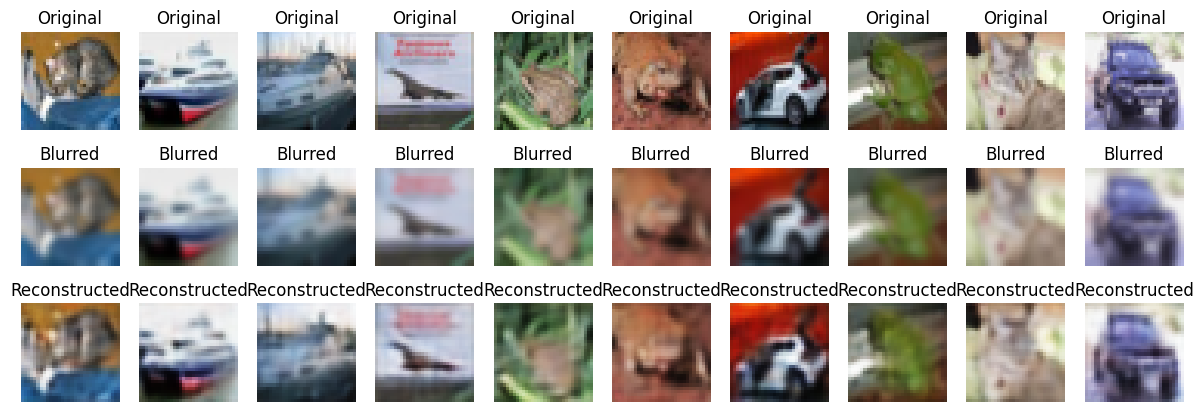

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(training_images, _), (test_images, _) = tf.keras.datasets.cifar10.load_data()

# Reshape and normalize to [0, 1]
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Apply Gaussian Blur to create noisy images
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    blurred_images = []
    for img in images:
        blurred_img = cv2.GaussianBlur(img, kernel_size, 0)
        blurred_images.append(blurred_img)
    return np.array(blurred_images)

# Create blurred versions of the training and test images
blurred_training_images = apply_gaussian_blur(training_images)
blurred_test_images = apply_gaussian_blur(test_images)

# CNN Autoencoder Model
cnn_autoencoder = models.Sequential()

# Encoder
cnn_autoencoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
cnn_autoencoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))
cnn_autoencoder.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.MaxPooling2D((2, 2), padding='same'))

# Decoder
cnn_autoencoder.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_autoencoder.add(layers.UpSampling2D((2, 2)))
cnn_autoencoder.add(layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# Define custom metrics to track during training
class CustomMetrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(CustomMetrics, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Get predictions
        y_pred = self.model.predict(self.validation_data[0])
        y_true = self.validation_data[1]

        # Convert to binary format using a threshold
        y_pred_binary = (y_pred > 0.5).astype(int)
        y_true_binary = (y_true > 0.5).astype(int)

        # Calculate True Positives, True Negatives, False Positives, False Negatives
        TP = np.sum(np.logical_and(y_pred_binary == 1, y_true_binary == 1))
        TN = np.sum(np.logical_and(y_pred_binary == 0, y_true_binary == 0))
        FP = np.sum(np.logical_and(y_pred_binary == 1, y_true_binary == 0))
        FN = np.sum(np.logical_and(y_pred_binary == 0, y_true_binary == 1))

        # Calculate Precision, Recall, Accuracy
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        accuracy = (TP + TN) / (TP + TN + FP + FN)

        # Log metrics
        logs['val_precision'] = precision
        logs['val_recall'] = recall
        logs['val_accuracy'] = accuracy
        print(f' - val_precision: {precision:.4f} - val_recall: {recall:.4f} - val_accuracy: {accuracy:.4f}')

# Create an instance of CustomMetrics with validation data
cnn_metrics = CustomMetrics(validation_data=(blurred_test_images, test_images))

# Compile the autoencoder
cnn_autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with custom metrics
history_cnn = cnn_autoencoder.fit(blurred_training_images, training_images, epochs=50, 
                                   batch_size=64, validation_data=(blurred_test_images, test_images), 
                                   callbacks=[cnn_metrics])

# Function to display original, blurred, and reconstructed images
def display_images(original, blurred, reconstructed, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Display blurred images
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(blurred[i])
        plt.title("Blurred")
        plt.axis("off")

        # Display reconstructed images
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

# Get reconstructed images
reconstructed_images = cnn_autoencoder.predict(blurred_test_images)

# Display the original, blurred, and reconstructed images
display_images(test_images, blurred_test_images, reconstructed_images)


# Combined Plot Showing valuable statistics for the autoencoders

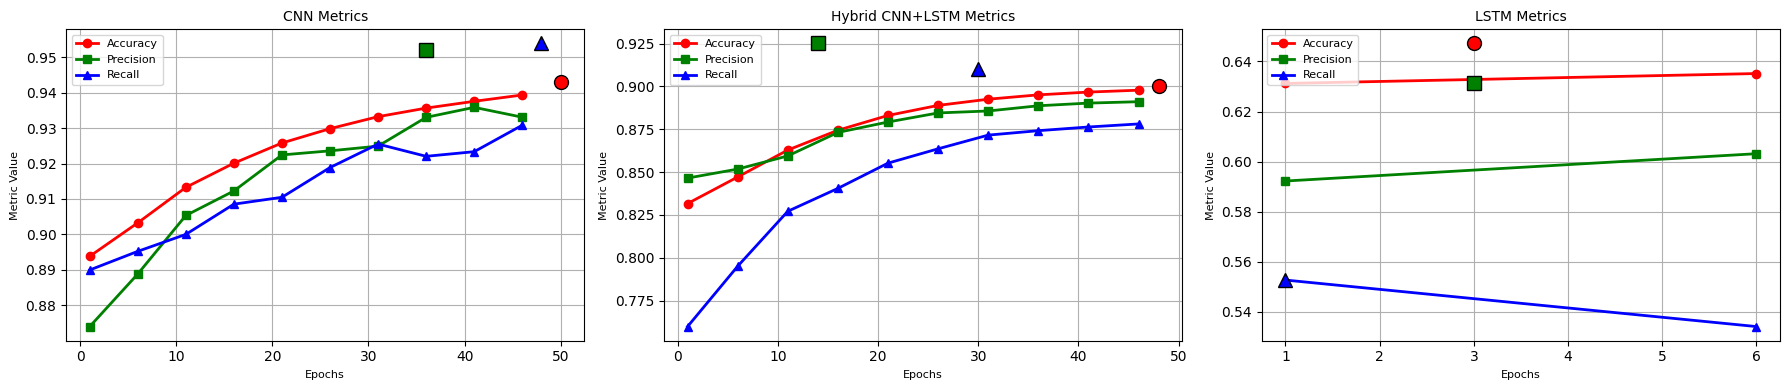

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Smoothing function to make the curve more readable
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting function for individual models (e.g., CNN, Hybrid, LSTM)
def plot_metrics_subplot(ax, history, model_name, show_every_nth_epoch=5):
    epochs = range(1, len(history.history['val_accuracy']) + 1)
    filtered_epochs = epochs[::show_every_nth_epoch]
    
    # Smoothing the curves
    accuracy_smoothed = smooth_curve(history.history['val_accuracy'])
    precision_smoothed = smooth_curve(history.history['val_precision'])
    recall_smoothed = smooth_curve(history.history['val_recall'])
    
    # Filter the smoothed data for every Nth epoch
    accuracy_smoothed_filtered = np.array(accuracy_smoothed)[::show_every_nth_epoch]
    precision_smoothed_filtered = np.array(precision_smoothed)[::show_every_nth_epoch]
    recall_smoothed_filtered = np.array(recall_smoothed)[::show_every_nth_epoch]

    # Plot on the given axis `ax`
    ax.plot(filtered_epochs, accuracy_smoothed_filtered, 'r-o', label='Accuracy', linewidth=2, markersize=6)
    ax.plot(filtered_epochs, precision_smoothed_filtered, 'g-s', label='Precision', linewidth=2, markersize=6)
    ax.plot(filtered_epochs, recall_smoothed_filtered, 'b-^', label='Recall', linewidth=2, markersize=6)

    # Highlight the best points
    max_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
    max_prec_epoch = np.argmax(history.history['val_precision']) + 1
    max_recall_epoch = np.argmax(history.history['val_recall']) + 1
    ax.plot(max_acc_epoch, max(history.history['val_accuracy']), 'ro', markersize=10, markeredgecolor='black')
    ax.plot(max_prec_epoch, max(history.history['val_precision']), 'gs', markersize=10, markeredgecolor='black')
    ax.plot(max_recall_epoch, max(history.history['val_recall']), 'b^', markersize=10, markeredgecolor='black')

    # Set title, labels, and gridlines
    ax.set_title(f'{model_name} Metrics', fontsize=10)
    ax.set_xlabel('Epochs', fontsize=8)
    ax.set_ylabel('Metric Value', fontsize=8)
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=8)

# Function to plot the three models side by side
def plot_all_models(history_cnn, history_hybrid, history_lstm, show_every_nth_epoch=5):
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))  # Create 1 row, 3 columns for CNN, Hybrid, LSTM
    plot_metrics_subplot(axes[0], history_cnn, model_name="CNN", show_every_nth_epoch=show_every_nth_epoch)
    plot_metrics_subplot(axes[1], history_hybrid, model_name="Hybrid CNN+LSTM", show_every_nth_epoch=show_every_nth_epoch)
    plot_metrics_subplot(axes[2], history_lstm, model_name="LSTM", show_every_nth_epoch=show_every_nth_epoch)
    
    plt.tight_layout()
    plt.show()

# Assuming you have history objects for CNN, Hybrid, and LSTM
plot_all_models(history_cnn, history_hybrid, history_lstm, show_every_nth_epoch=5)


# Anayltics Use Case

Model: "functional_136"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)   │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_39 (Conv2D)            │ (None, 32, 32, 32)        │             896 │ input_layer_20[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_15              │ (None, 16, 16, 32)        │               0 │ conv2d_39[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_40 (Conv2D)            │ (None, 16, 16, 64)        │          18,496 │ max_pooling2d_15[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_16              │ (None, 8, 8, 64)          │               0 │ conv2d_40[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_41 (Conv2D)            │ (None, 8, 8, 128)         │          73,856 │ max_pooling2d_16[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_17              │ (None, 4, 4, 128)         │               0 │ conv2d_41[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_42 (Conv2D)            │ (None, 4, 4, 128)         │         147,584 │ max_pooling2d_17[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_15              │ (None, 8, 8, 128)         │               0 │ conv2d_42[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_43 (Conv2D)            │ (None, 8, 8, 64)          │          73,792 │ up_sampling2d_15[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_16              │ (None, 16, 16, 64)        │               0 │ conv2d_43[0][0]            │
│ (UpSampling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_44 (Conv2D)            │ (None, 16, 16, 32)        │          18,464 │ up_sampling2d_16[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling2d_2    │ (None, 128)               │               0 │ max_pooling2d_17[0][0]     │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ up_sampling2d_17              │ (None, 32, 32, 32)        │               0 │ conv2d_44[0][0]            │
│ (UpSampling2D)                │                           │               

 Total params: 351,757 (1.34 MB)

 Trainable params: 351,757 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - conv2d_45_loss: 0.0132 - dense_26_accuracy: 0.2598 - dense_26_loss: 0.9840 - loss: 0.9972 - val_conv2d_45_loss: 0.0065 - val_dense_26_accuracy: 0.4031 - val_dense_26_loss: 0.7933 - val_loss: 0.8000
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - conv2d_45_loss: 0.0064 - dense_26_accuracy: 0.4402 - dense_26_loss: 0.7631 - loss: 0.7694 - val_conv2d_45_loss: 0.0057 - val_dense_26_accuracy: 0.4759 - val_dense_26_loss: 0.7095 - val_loss: 0.7149
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - conv2d_45_loss: 0.0056 - dense_26_accuracy: 0.4912 - dense_26_loss: 0.6920 - loss: 0.6977 - val_conv2d_45_loss: 0.0054 - val_dense_26_accuracy: 0.5213 - val_dense_26_loss: 0.6585 - val_loss: 0.6637
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - conv2d_45_loss: 0.0053 - dense_26_accuracy: 0.5357 - dense_26_loss: 0.6419 - loss: 0.6472 - val_conv2d_45_loss: 0.0052 - val_dense_26_accuracy: 0.5535 - val_dense_26_loss: 0.6198 - v

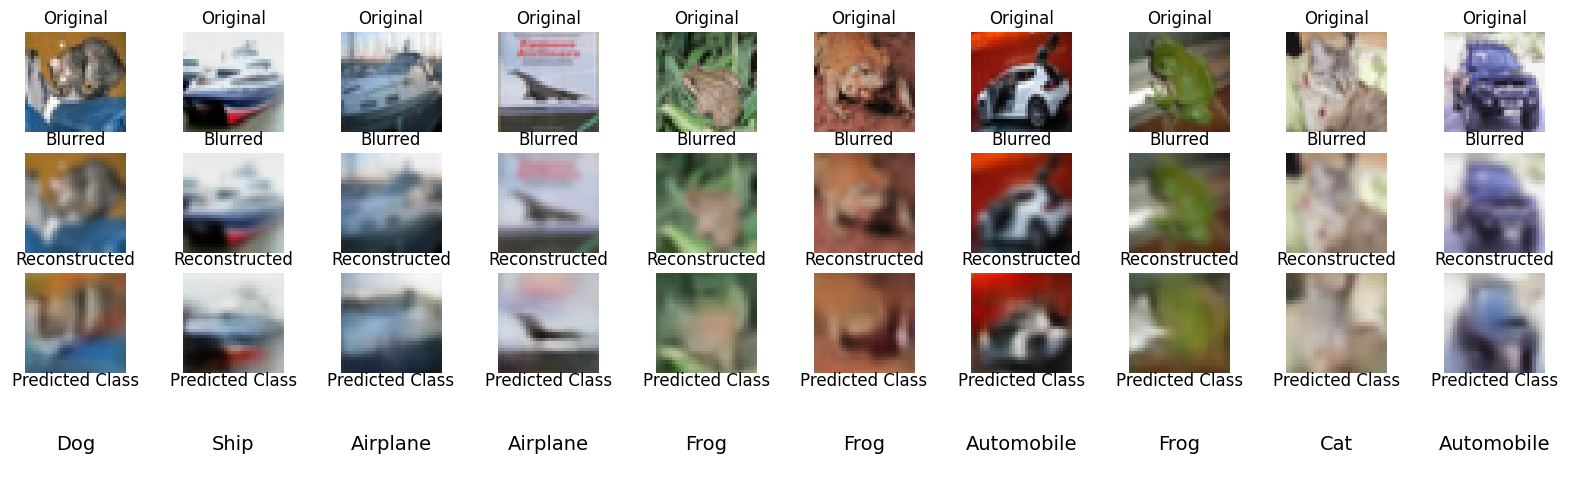

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Reshape and normalize to [0, 1]
training_images = training_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Apply Gaussian Blur to create noisy images
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    blurred_images = []
    for img in images:
        blurred_img = cv2.GaussianBlur(img, kernel_size, 0)
        blurred_images.append(blurred_img)
    return np.array(blurred_images)

# Create blurred versions of the training and test images
blurred_training_images = apply_gaussian_blur(training_images)
blurred_test_images = apply_gaussian_blur(test_images)

# CNN Autoencoder Model with Classification Head
def build_cnn_autoencoder_classifier(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder for image reconstruction
    decoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)
    
    # Classifier head
    x_classification = layers.GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensionality
    x_classification = layers.Dense(128, activation='relu')(x_classification)
    classification_output = layers.Dense(num_classes, activation='softmax')(x_classification)
    
    # Model with two outputs: reconstructed image and classification output
    model = models.Model(inputs=inputs, outputs=[decoded, classification_output])

    # Compile the model with two metrics: accuracy for classification and no metrics for reconstruction
    model.compile(optimizer='adam', 
                  loss=['mse', 'sparse_categorical_crossentropy'], 
                  loss_weights=[0.5, 0.5], 
                  metrics=[None, 'accuracy'])  # No metric for reconstruction, accuracy for classification

    return model

# Create the model
cnn_autoencoder_classifier = build_cnn_autoencoder_classifier()

# Print model summary
cnn_autoencoder_classifier.summary()

# Train the model
history = cnn_autoencoder_classifier.fit(blurred_training_images, 
                                         [training_images, training_labels], 
                                         epochs=20, batch_size=64, 
                                         validation_data=(blurred_test_images, [test_images, test_labels]))

# Evaluate the model on test data
test_loss, test_reconstruction_loss, test_classification_loss, test_accuracy = cnn_autoencoder_classifier.evaluate(
    blurred_test_images, [test_images, test_labels])

print(f"Test accuracy: {test_accuracy}")

# Get reconstructed images and classification predictions
reconstructed_images, class_predictions = cnn_autoencoder_classifier.predict(blurred_test_images)

# Function to display original, blurred, reconstructed, and classified images
def display_images_with_classification(original, blurred, reconstructed, class_predictions, num_images=10):
    class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
    
    plt.figure(figsize=(20, 6))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(4, num_images, i + 1)
        plt.imshow(original[i])
        plt.title("Original")
        plt.axis("off")

        # Display blurred images
        ax = plt.subplot(4, num_images, i + 1 + num_images)
        plt.imshow(blurred[i])
        plt.title("Blurred")
        plt.axis("off")

        # Display reconstructed images
        ax = plt.subplot(4, num_images, i + 1 + 2 * num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis("off")

        # Display predicted class labels
        ax = plt.subplot(4, num_images, i + 1 + 3 * num_images)
        plt.text(0.5, 0.5, class_labels[np.argmax(class_predictions[i])], fontsize=14, ha='center', va='center')
        plt.title("Predicted Class")
        plt.axis("off")

    plt.show()

# Display some original, blurred, reconstructed images, and predicted class labels
display_images_with_classification(test_images, blurred_test_images, reconstructed_images, class_predictions)
